<a href="https://colab.research.google.com/github/sunujoseph/CSCI4050ML/blob/master/Copy_of_CSCI_4050U_lecture_2019_10_30_convnet_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pl
import tensorflow.keras as K

In [ ]:
(x_train, d_train), (x_test, d_test) = K.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train / 255.

In [ ]:
x_train.shape

(60000, 28, 28)

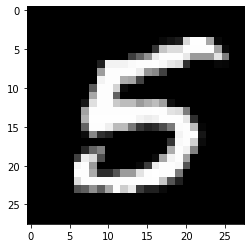

In [ ]:
pl.imshow(x_train[20000], cmap='gray');

In [ ]:
d_train[20000]

5

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense, Reshape, Flatten

In [ ]:
conv_layer = Conv2D(23, kernel_size=(5, 5), padding='same')

In [ ]:
y = conv_layer(np.reshape(x_train[:1000], (-1, 28, 28, 1)))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [ ]:
pool_layer = MaxPool2D(pool_size=3)

In [ ]:
z = pool_layer(y)

In [ ]:
z.shape

TensorShape([1000, 9, 9, 23])

In [ ]:
flatten_layer = Flatten()

In [ ]:
u = flatten_layer(z)

In [ ]:
u.shape

TensorShape([1000, 1863])

In [ ]:
dense_layer = Dense(10, activation='softmax')

In [ ]:
p = dense_layer(u)

In [ ]:
p.shape

TensorShape([1000, 10])

In [ ]:
Y_out = p.numpy()

In [ ]:
d_out = np.argmax(Y_out, axis=1)

In [ ]:
d_out[:10]

array([6, 0, 9, 6, 0, 9, 0, 6, 9, 9])

In [ ]:
d_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

# Sequential model using Conv Net

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential([
    Input((28, 28)),
    Reshape((28, 28, 1)),
    Conv2D(16, kernel_size=(5, 5), padding='same'),
    MaxPool2D(pool_size=3),
    Flatten(),
    Dense(10, activation='softmax')                   
])

In [ ]:
model.compile(loss=tf.losses.sparse_categorical_crossentropy, optimizer='adam', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1296)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                12970     
Total params: 13,386
Trainable params: 13,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, d_train, epochs=1, batch_size=32)

Train on 60000 samples
60000/60000 [==============================] - 19s 321us/sample - loss: 0.2462 - acc: 0.9321


In [ ]:
model.evaluate(x_test, d_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[33.583789592368866, 0.9123]